# Trabajando con Series Temporales

``Pandas`` se desarrolló en el contexto del modelado financiero, por lo que, como era de esperar, contiene un conjunto bastante extenso de herramientas para trabajar con fechas, horas y datos indexados en el tiempo.
Los datos de fecha y hora vienen en varias formas, que analizaremos aquí:

- *Time stamps* hacen referencia a momentos particulares en el tiempo (por ejemplo, el 4 de julio de 2015 a las 7:00 a. m.).
- *Time intervals* y los *periods* hacen referencia a un período de tiempo entre un punto inicial y final particular; por ejemplo, el año 2015. Los períodos generalmente hacen referencia a un caso especial de intervalos de tiempo en los que cada intervalo tiene una duración uniforme y no se superpone (por ejemplo, períodos de 24 horas que comprenden días).
- *Time deltas* o *durations* hacen referencia a una duración de tiempo exacta (por ejemplo, una duración de 22,56 segundos).

En esta sección, presentaremos cómo trabajar con cada uno de estos tipos de datos de fecha/hora en Pandas.
Esta breve sección no es de ninguna manera una guía completa de las herramientas de series de tiempo disponibles en Python o Pandas, sino que pretende ser una descripción general amplia de cómo usted, como usuario, debe abordar el trabajo con series temporales.
Comenzaremos con una breve discusión de las herramientas para manejar fechas y horas en Python, antes de pasar más específicamente a una discusión de las herramientas proporcionadas por ``Pandas``.
Después de enumerar algunos recursos que profundizan, revisaremos algunos ejemplos breves de cómo trabajar con datos de series temporales en ``Pandas``.

## Fechas y horas en Python

El mundo Python tiene varias representaciones disponibles de fechas, horas, *deltas* y *timespans*.
Si bien las herramientas de series temporales proporcionadas por ``Pandas`` tienden a ser las más útiles para aplicaciones de ciencia de datos, es útil ver su relación con otros paquetes utilizados en Python.

### Fechas y horas nativas de Python: ``datetime`` y ``dateutil``

Los objetos básicos de Python para trabajar con fechas y horas residen en el módulo incorporado ``datetime``.
Junto con el módulo ``dateutil`` de terceros, puede usarlo para realizar rápidamente una serie de funciones útiles en fechas y horas.
Por ejemplo, puedes crear manualmente una fecha usando el tipo ``datetime``:

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

O, usando el módulo ``dateutil``, puedes analizar fechas de una variedad de formatos de cadena:

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Una vez que tenga un objeto ``datetime``, puede hacer cosas como imprimir el día de la semana:

In [3]:
date.strftime('%A')

'Saturday'

En la última linea, hemos utilizado uno de los códigos de formato de cadena estándar para imprimir fechas (``"%A"``), sobre el cual puede leer en la [sección strftime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) de la [documentación *datetime* de Python](https://docs.python.org/3/library/datetime.html).
Puede encontrar documentación sobre otras utilidades en [documentación online de *dateutils*](http://labix.org/python-dateutil).
Un paquete relacionado que se debe tener en cuenta es ``pytz``, que contiene herramientas para trabajar con los datos de series temporales que más migrañas provocan: las zonas horarias.

El poder de ``datetime`` y ``dateutil`` radica en su flexibilidad y sintaxis sencilla: puede utilizar estos objetos y sus métodos integrados para realizar fácilmente casi cualquier operación que le pueda interesar.
Donde se descomponen es cuando desea trabajar con grandes conjuntos de fechas y horas:
Así como las listas de variables numéricas de Python son subóptimas en comparación con las matrices numéricas escritas al estilo ``NumPy``, las listas de objetos de fecha y hora de Python son subóptimas en comparación con las matrices escritas de fechas codificadas.

### Tipado de arrays de tiempo: ``datetime64`` de ``Numpy``

Las debilidades del formato de fecha y hora de Python inspiraron al equipo de ``NumPy`` a agregar un conjunto de tipos de datos de series temporales nativos a ``NumPy``.
El tipo ``datetime64`` codifica fechas como enteros de 64 bits y, por lo tanto, permite representar matrices de fechas de manera muy compacta.
El ``datetime64`` requiere un formato de entrada muy específico:

In [4]:
import numpy as np
date = np.array('2015-07-04', np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Sin embargo, una vez que hayamos formateado esta fecha, podemos realizar rápidamente operaciones vectorizadas en ella:

In [5]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [6]:
date + np.arange(12) #se suman dias en este caso

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Debido al tipo uniforme en las matrices ``datetime64`` de ``NumPy``, este tipo de operación se puede realizar mucho más rápido que si estuviéramos trabajando directamente con los objetos ``datetime`` de Python, especialmente a medida que las matrices crecen.

Un detalle de los objetos ``datetime64`` y ``timedelta64`` es que están construidos en una *unidad de tiempo fundamental*.
Debido a que el objeto ``datetime64`` está limitado a una precisión de 64 bits, el rango de tiempos codificables es de $2^{64}$ veces la unidad fundamental.
En otras palabras, ``datetime64`` establece un equilibrio entre *resolución de tiempo* e *intervalo de tiempo máximo*.

Por ejemplo, si desea una resolución temporal de un nanosegundo, solo tendrá suficiente información para codificar un rango de $2^{64}$ nanosegundos, o algo menos de 600 años.
``NumPy`` inferirá la unidad deseada a partir de la entrada; por ejemplo, aquí hay una fecha y hora basada en días:

In [7]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

Aquí hay una fecha y hora basada en minutos:

In [8]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

Observe que la zona horaria se establece automáticamente en la hora local en la computadora que ejecuta el código.
Puede forzar cualquier unidad fundamental que desee utilizando uno de los muchos códigos de formato; por ejemplo, aquí forzaremos un tiempo basado en nanosegundos:

In [9]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

La siguiente tabla, extraida de la [documentación datetime64 Numpy](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), enumera los códigos de formato disponibles junto con los intervalos de tiempo relativos y absolutos en los que puede codificar.

|Código  | Significado | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

Para los tipos de datos que vemos en el mundo real, un valor predeterminado útil es ``datetime64[ns]``, ya que puede codificar un rango útil de fechas modernas con una precisión adecuada.

Finalmente, observaremos que si bien el tipo de datos ``datetime64`` soluciona algunas de las deficiencias del tipo ``datetime`` incorporado en Python, carece de muchos de los métodos y funciones convenientes proporcionados por ``datetime`` y especialmente ``dateutil``.
Puede encontrar más información en la documentación datetime64 de NumPy.

### Fechas y horas en ``Pandas``: lo mejor de ambos mundos

Pandas se basa en todas las herramientas que acabamos de comentar para proporcionar un objeto ``Timestamp``, que combina la facilidad de uso de ``datetime`` y ``dateutil`` con el almacenamiento eficiente y la interfaz vectorizada de ``numpy.datetime64``.
A partir de un grupo de estos objetos ``Timestamp``, ``Pandas`` puede construir un ``DatetimeIndex`` que puede usarse para indexar datos en una ``Series`` o ``DataFrame``; Veremos muchos ejemplos de esto a continuación.

Por ejemplo, podemos usar las herramientas de ``Pandas`` para repetir la demostración anterior.
Podemos analizar una fecha de cadena con formato flexible y usar códigos de formato para generar el día de la semana:

In [10]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [11]:
date1 = pd.to_datetime("2015-04-07", format='%Y-%d-%m')
# especifico esquema de la fecha y me hace la traduccion a año, mes y dia
date1

Timestamp('2015-07-04 00:00:00')

In [12]:
date.strftime('%A')

'Saturday'

Además, podemos realizar operaciones vectorizadas estilo ``NumPy`` directamente sobre este mismo objeto:

In [13]:
date + pd.to_timedelta(np.arange(12), 'W')

DatetimeIndex(['2015-07-04', '2015-07-11', '2015-07-18', '2015-07-25',
               '2015-08-01', '2015-08-08', '2015-08-15', '2015-08-22',
               '2015-08-29', '2015-09-05', '2015-09-12', '2015-09-19'],
              dtype='datetime64[ns]', freq=None)

In [14]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

En la siguiente sección, analizaremos más de cerca la manipulación de datos de series de tiempo con las herramientas proporcionadas por ``Pandas``.

## Serie temporal de ``Pandas``: indexación por tiempo

Donde las herramientas de series temporales de ``Pandas`` realmente se vuelven útiles es cuando comienzas a *indexar datos por marcas de tiempo*.
Por ejemplo, podemos construir un objeto ``Serie`` que tenga datos indexados en el tiempo:

In [15]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Ahora que tenemos estos datos en una ``Serie``, podemos hacer uso de cualquiera de los patrones de indexación de ``Serie`` que analizamos en secciones anteriores, pasando valores que pueden convertirse en fechas:

In [16]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

Hay operaciones especiales adicionales de indexación solo por fecha, como pasar un año para obtener una porción de todos los datos de ese año:

In [17]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Más adelante veremos ejemplos adicionales de la conveniencia de las fechas como índices.
Pero primero, una mirada más cercana a las estructuras de datos de series temporales disponibles.

## Estructuras de datos de series temporales de Pandas

Esta sección presentará las estructuras de datos fundamentales de ``Pandas`` para trabajar con datos de series temporales:

- Para *time stamps*, ``Pandas`` proporciona el tipo ``Timestamp``. Como se mencionó anteriormente, es esencialmente un reemplazo del ``datetime`` nativo de Python, pero se basa en el tipo de datos más eficiente ``numpy.datetime64``. La estructura de índice asociada es ``DatetimeIndex``.
- Para *time Periods*, ``Pandas`` proporciona el tipo ``Período``. Esto codifica un intervalo de frecuencia fija basado en ``numpy.datetime64``. La estructura de índice asociada es ``PeriodIndex``.
- Para *time deltas* o *durations*, ``Pandas`` proporciona el tipo ``Timedelta``. ``Timedelta`` es un reemplazo más eficiente para el tipo nativo ``datetime.timedelta`` de Python y está basado en ``numpy.timedelta64``. La estructura de índice asociada es ``TimedeltaIndex``.

Los más fundamentales de estos objetos de fecha/hora son los objetos ``Timestamp`` y ``DatetimeIndex``.
Si bien estos objetos de clase se pueden invocar directamente, es más común usar la función ``pd.to_datetime()``, que puede analizar una amplia variedad de formatos.
Pasar una sola fecha a ``pd.to_datetime()`` produce una ``Timestamp``; pasar una serie de fechas de forma predeterminada genera un ``DatetimeIndex``:

In [18]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Cualquier ``DatetimeIndex`` se puede convertir en un ``PeriodIndex`` con la función ``to_period()`` con la adición de un código de frecuencia; aquí usaremos ``'D'`` para indicar la frecuencia diaria:

In [19]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

Un ``TimedeltaIndex`` se crea, por ejemplo, cuando se resta una fecha de otra:

In [20]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Secuencias regulares: ``pd.date_range()``

Para hacer más conveniente la creación de secuencias de fechas regulares, Pandas ofrece algunas funciones para este propósito: ``pd.date_range()`` para marcas de tiempo, ``pd.period_range()`` para períodos y ``pd.timedelta_range()`` para deltas de tiempo.
Hemos visto que ``range()`` de Python y ``np.arange()`` de ``NumPy`` convierten un punto inicial, un punto final y un tamaño de paso opcional en una secuencia.
De manera similar, ``pd.date_range()`` acepta una fecha de inicio, una fecha de finalización y un código de frecuencia opcional para crear una secuencia regular de fechas.
Por defecto, la frecuencia es de un día:

In [21]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternativamente, el rango de fechas se puede especificar no con un punto inicial y final, sino con un punto inicial y una cantidad de períodos:

In [22]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

El espaciado se puede modificar alterando el argumento ``freq``, que por defecto es ``D``.
Por ejemplo, aquí construiremos un rango de marcas de tiempo por hora:

In [23]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

Para crear secuencias regulares de valores ``Period`` o ``Timedelta``, las funciones muy similares ``pd.period_range()`` y ``pd.timedelta_range()`` son útiles.
A continuación se muestran algunos períodos mensuales:

In [24]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

Y una secuencia de duraciones que aumentan en una hora:

In [25]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Todo esto requiere una comprensión de los códigos de frecuencia de ``Pandas``, que resumiremos en la siguiente sección.

## Frecuencias y compensaciones

Fundamental para estas herramientas de series temporales de Pandas es el concepto de frecuencia o compensación (*offset*) de fecha.
Así como vimos los códigos ``D`` (día) y ``H`` (hora) arriba, podemos usar dichos códigos para especificar cualquier espaciado de frecuencia deseado.
La siguiente tabla resume los principales códigos disponibles:

| Código | Descripción       | Código | Descripción                |
|--------|-------------------|--------|----------------------------|
| ``D``  | Día calendario    | ``B``  | Día laborable              |
| ``W``  | Semanal           |        |                            |
| ``M``  | Fin de mes        | ``BM`` | Fin de mes laborable       |
| ``Q``  | Fin de trimestre  | ``BQ`` | Fin de trimestre laborable |
| ``A``  | Fin de año        | ``BA`` | Fin de año laborable       |
| ``H``  | Horas             | ``BH`` | Horas laborable            |
| ``T``  | Minutos           |        |                            |
| ``S``  | Segundos          |        |                            |
| ``L``  | Milisegundos      |        |                            |
| ``U``  | Microsegundos     |        |                            |
| ``N``  | Nanosegundos      |        |                            |

Las frecuencias mensuales, trimestrales y anuales están marcadas al final del período especificado.
Al agregar un sufijo ``S`` a cualquiera de estos, se marcarán al principio:

| Código  | Descripción          | Código | Descripción                  |
|---------|----------------------|--------|------------------------------|
| ``MS``  | Inicio del mes       |``BMS`` | Inicio del mes laboral       |
| ``QS``  | Inicio del trimestre |``BQS`` | Inicio del trimestre laboral |
| ``AS``  | Inicio del año       |``BAS`` | Inicio del año laboral       |

Además, puede cambiar el mes utilizado para marcar cualquier código trimestral o anual agregando un código de mes de tres letras como sufijo:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

Del mismo modo, el punto de división de la frecuencia semanal se puede modificar añadiendo un código de día laborable de tres letras:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

Además, los códigos se pueden combinar con números para especificar otras frecuencias.
Por ejemplo, para una frecuencia de 2 horas 30 minutos, podemos combinar los códigos de hora (``H``) y minutos (``T``) de la siguiente manera:

In [26]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

Todos estos códigos cortos se refieren a instancias específicas de compensaciones de series temporales de ``Pandas``, que se pueden encontrar en el módulo ``pd.tseries.offsets``.
Por ejemplo, podemos crear una compensación de día hábil directamente de la siguiente manera:

In [27]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting y Windowing

La capacidad de utilizar fechas y horas como índices para organizar y acceder a los datos de forma intuitiva es una pieza importante de las herramientas de series temporales de ``Pandas``.
Los beneficios de los datos indexados en general (alineación automática durante las operaciones, acceso y división de datos intuitivos, etc.) aún se aplican, y ``Pandas`` proporciona varias operaciones adicionales específicas de series de tiempo.

Echaremos un vistazo a algunos de ellos aquí, utilizando algunos datos del precio de las acciones como ejemplo.
Debido a que ``Pandas`` se desarrolló en gran medida en un contexto financiero, incluye algunas herramientas muy específicas para datos financieros.
Por ejemplo, el paquete ``pandas-datareader`` adjunto (que se puede instalar mediante ``conda install pandas-datareader``) sabe cómo importar datos financieros de varias fuentes disponibles, incluidas Yahoo Finance, Google Finance y otras.
Aquí cargaremos el historial de precios de cierre de Google:

In [28]:
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

goog = pdr.get_data_yahoo('GOOG', start='2019-11-21', end='2023-11-21')

print(goog)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-11-21   65.073997   65.629501   64.650002   65.067497   64.993538   
2019-11-22   65.280998   65.436501   64.570503   64.766998   64.693382   
2019-11-25   64.959000   65.565498   64.906502   65.334503   65.260239   
2019-11-26   65.492996   65.739998   65.254501   65.677498   65.602844   
2019-11-27   65.750000   65.917999   65.481499   65.649498   65.574875   
...                ...         ...         ...         ...         ...   
2023-11-14  135.649994  137.240005  135.100006  135.429993  135.276062   
2023-11-15  136.639999  136.839996  135.330002  136.380005  136.224991   
2023-11-16  136.960007  138.880005  136.080002  138.699997  138.542343   
2023-11-17  137.820007  138.000000  135.479996  136.940002  136.784348   
2023-11-20  135.500000  138.425003  135.490

Para simplificar, usaremos solo el precio de cierre:

In [29]:
goog = goog['Close']

In [30]:
print(goog)

Date
2019-11-21     65.067497
2019-11-22     64.766998
2019-11-25     65.334503
2019-11-26     65.677498
2019-11-27     65.649498
                 ...    
2023-11-14    135.429993
2023-11-15    136.380005
2023-11-16    138.699997
2023-11-17    136.940002
2023-11-20    137.919998
Name: Close, Length: 1006, dtype: float64


Podemos visualizar esto usando el método ``plot()``, después del texto estándar de configuración de ``Matplotlib``:

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

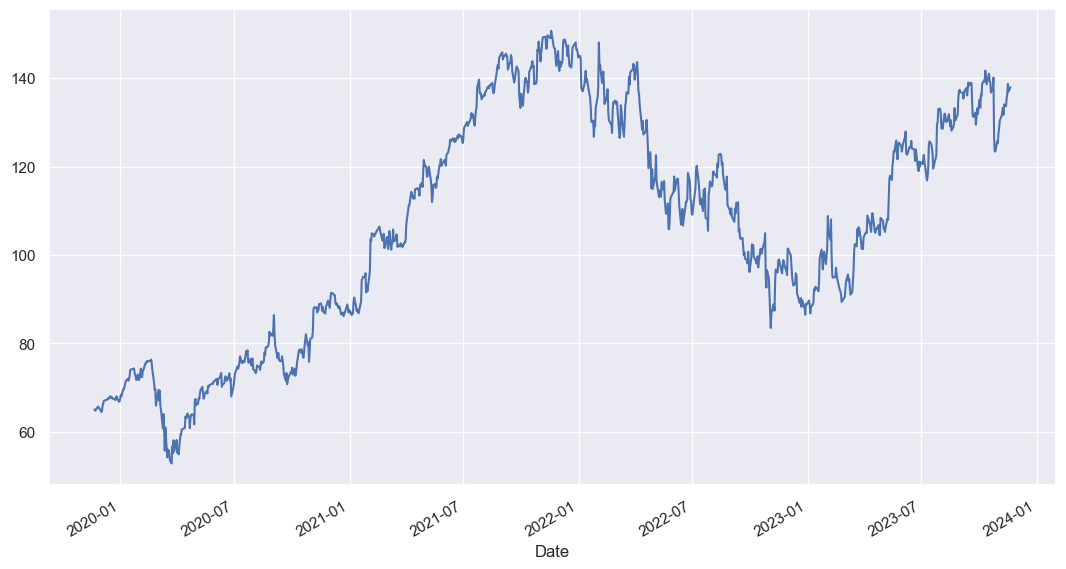

In [32]:
goog.plot(figsize=(13,7));

### Resampling y conversión de frecuencias

Una necesidad común de datos de series temporales es el remuestreo a una frecuencia mayor o menor.
Esto se puede hacer usando el método ``resample()``, o el método mucho más simple ``asfreq()``.
La principal diferencia entre los dos es que ``resample()`` es fundamentalmente una *agregación de datos*, mientras que ``asfreq()`` es fundamentalmente una *selección de datos*.

Echando un vistazo al precio de cierre de Google, comparemos lo que devuelven los dos cuando reducimos la muestra de los datos.
Aquí volveremos a muestrear los datos al final del año comercial:

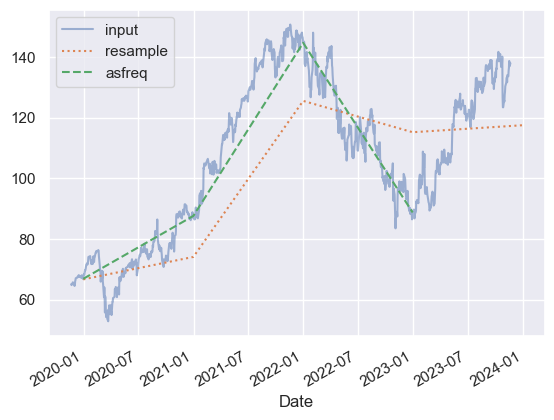

In [33]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':') #BA ultimo dia lavorable del año
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Observe la diferencia: en cada punto, ``resample`` informa el *promedio del año anterior*, mientras que ``asfreq`` informa el *valor al final del año*.

Para el muestreo ascendente, ``resample()`` y ``asfreq()`` son en gran medida equivalentes, aunque resample tiene muchas más opciones disponibles.
En este caso, el valor predeterminado para ambos métodos es dejar los puntos muestreados vacíos, es decir, llenos con valores NA.
Al igual que con la función ``pd.fillna()`` discutida anteriormente, ``asfreq()`` acepta un argumento ``método`` para especificar cómo se imputan los valores.
Aquí, volveremos a muestrear los datos del día hábil con una frecuencia diaria (es decir, incluidos los fines de semana):

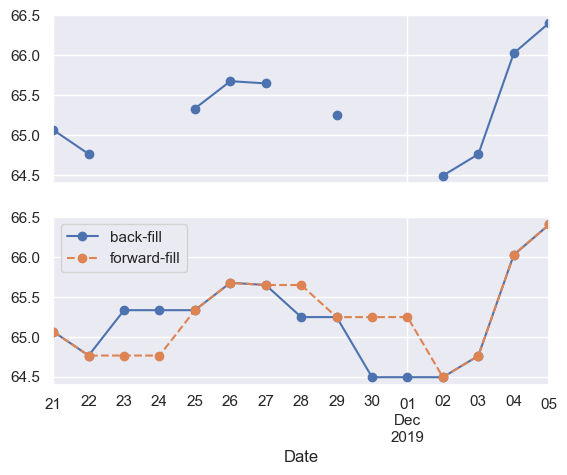

In [34]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

El panel superior es el predeterminado: los días no hábiles se dejan como valores NA y no aparecen en el gráfico.
El panel inferior muestra las diferencias entre dos estrategias para llenar los vacíos: llenar hacia adelante y llenar hacia atrás.

### Modificaciones temporales

Otra operación común específica de series temporales es el desplazamiento de datos en el tiempo.
``Pandas`` tiene dos métodos estrechamente relacionados para calcular esto: ``shift()`` y ``tshift()``
En resumen, la diferencia entre ellos es que ``shift()`` *desplaza los datos*, mientras que ``tshift()`` *desplaza el índice*.
En ambos casos, el desplazamiento se especifica en múltiplos de la frecuencia.

Aquí ``shift()`` y ``tshift()`` por 900 días;

In [35]:
#desplazo los valores con shift, y con shift freq='D' desplazo los dias

display(goog[:10], goog.shift(5)[:10], goog.shift(periods=5, freq='D')[:10])

Date
2019-11-21    65.067497
2019-11-22    64.766998
2019-11-25    65.334503
2019-11-26    65.677498
2019-11-27    65.649498
2019-11-29    65.248001
2019-12-02    64.496002
2019-12-03    64.764000
2019-12-04    66.027000
2019-12-05    66.406502
Name: Close, dtype: float64

Date
2019-11-21          NaN
2019-11-22          NaN
2019-11-25          NaN
2019-11-26          NaN
2019-11-27          NaN
2019-11-29    65.067497
2019-12-02    64.766998
2019-12-03    65.334503
2019-12-04    65.677498
2019-12-05    65.649498
Name: Close, dtype: float64

Date
2019-11-26    65.067497
2019-11-27    64.766998
2019-11-30    65.334503
2019-12-01    65.677498
2019-12-02    65.649498
2019-12-04    65.248001
2019-12-07    64.496002
2019-12-08    64.764000
2019-12-09    66.027000
2019-12-10    66.406502
Name: Close, dtype: float64

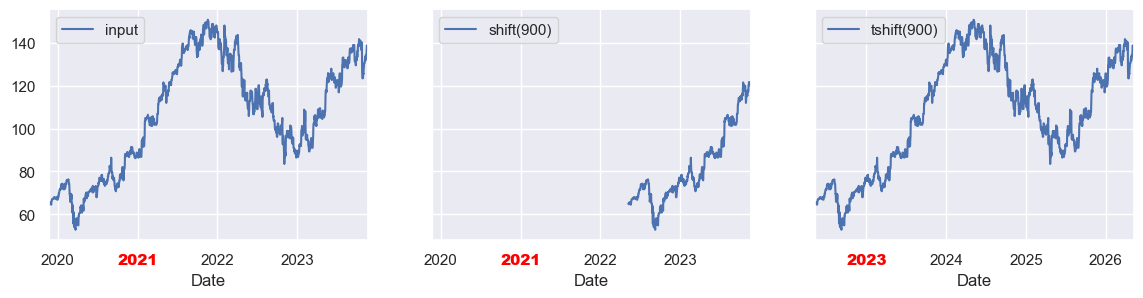

In [36]:
fig, ax = plt.subplots(ncols=3, sharey=True)
fig.set_size_inches(14,3, forward=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.shift(900, freq='D').plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

Vemos aquí que ``shift(900)`` desplaza los *datos* en 900 días, empujando parte de ellos fuera del final del gráfico (y dejando los valores NA en el otro extremo), mientras que ``tshift(900)` ` desplaza los *valores del índice* en 900 días.

Un contexto común para este tipo de cambio es el cálculo de las diferencias a lo largo del tiempo. Por ejemplo, utilizamos valores desplazados para calcular el retorno de la inversión de un año para las acciones de Google en el transcurso del conjunto de datos:

In [37]:
display(goog[:10], goog.shift(-365, freq='D')[:10])

Date
2019-11-21    65.067497
2019-11-22    64.766998
2019-11-23    64.766998
2019-11-24    64.766998
2019-11-25    65.334503
2019-11-26    65.677498
2019-11-27    65.649498
2019-11-28    65.649498
2019-11-29    65.248001
2019-11-30    65.248001
Freq: D, Name: Close, dtype: float64

Date
2018-11-21    65.067497
2018-11-22    64.766998
2018-11-23    64.766998
2018-11-24    64.766998
2018-11-25    65.334503
2018-11-26    65.677498
2018-11-27    65.649498
2018-11-28    65.649498
2018-11-29    65.248001
2018-11-30    65.248001
Freq: D, Name: Close, dtype: float64

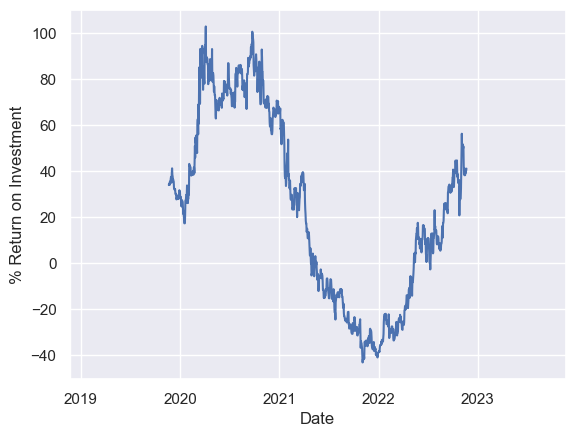

In [38]:
ROI = 100 * (goog.shift(-365, freq='D') / goog - 1) #(ingresos - inversion) / inversion
ROI.plot()
plt.ylabel('% Return on Investment');

In [39]:
ROI

Date
2018-11-21   NaN
2018-11-22   NaN
2018-11-23   NaN
2018-11-24   NaN
2018-11-25   NaN
              ..
2023-11-16   NaN
2023-11-17   NaN
2023-11-18   NaN
2023-11-19   NaN
2023-11-20   NaN
Freq: D, Name: Close, Length: 1826, dtype: float64

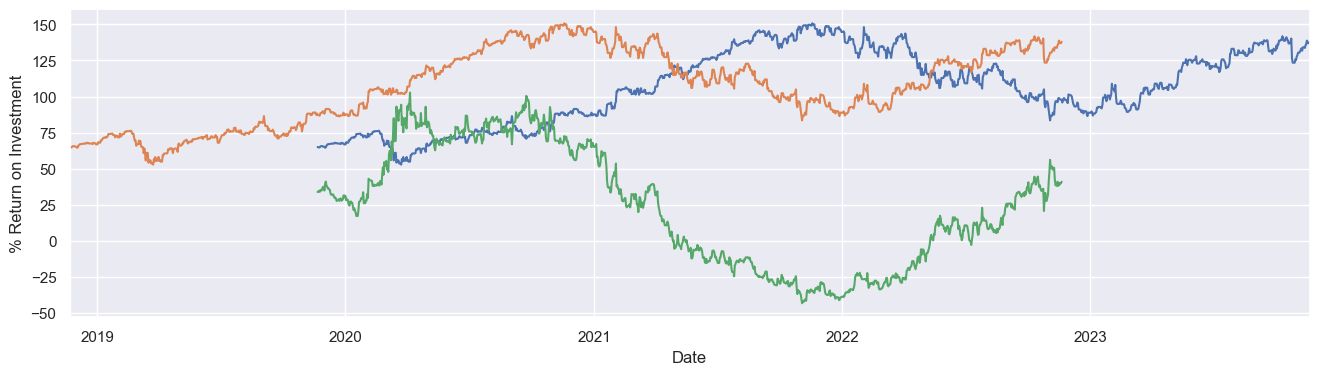

In [40]:
ROI = 100 * (goog.shift( periods = -365, freq = 'D') / goog - 1)
goog.plot(figsize=(16, 4))
plt.ylabel('Actual');
goog.shift( periods = -365, freq = 'D').plot(figsize=(16, 4))
plt.ylabel('Hace un año');
ROI.plot(figsize=(16, 4))
plt.ylabel('% Return on Investment');

Esto nos ayuda a ver la tendencia general de las acciones de Google: hasta ahora, los momentos más rentables para invertir en Google han sido (como era de esperar, en retrospectiva) poco después de su IPO y en medio de la recesión de 2009.

### Rolling windows

Las estadísticas móviles son un tercer tipo de operación específica de series temporales implementada por Pandas.
Esto se puede lograr mediante el atributo ``rolling()`` de los objetos ``Series`` y ``DataFrame``, que devuelve una vista similar a la que vimos con la operación ``groupby``.
Esta vista móvil pone a disposición una serie de operaciones de agregación de forma predeterminada.

Por ejemplo, aquí está la media móvil centrada en un año y la desviación estándar de los precios de las acciones de Google:

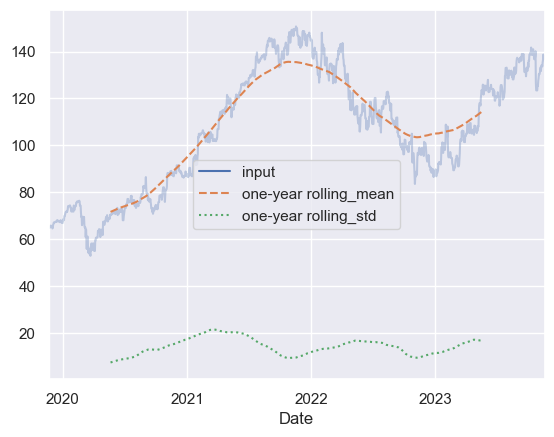

In [41]:
rolling = goog.rolling(365, center=True) #rolling.mean() metodo medias moviles centrada en un año

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(), #para los algoritmos de prediccion es mas facil usar curvas suaves
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

Al igual que con las operaciones de agrupación, los métodos ``aggregate()`` y ``apply()`` se pueden utilizar para cálculos continuos personalizados.

## Dónde aprender más

Esta sección ha proporcionado sólo un breve resumen de algunas de las características más esenciales de las herramientas de series temporales proporcionadas por ``Pandas``; para obtener una discusión más completa, puede consultar la documentación en línea de ``Pandas``.

Otro recurso excelente es el libro de texto [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) de Wes McKinney (OReilly, 2012).
Aunque ya tiene algunos años, es un recurso invaluable sobre el uso de ``Pandas``.
En particular, este libro enfatiza las herramientas de series temporales en el contexto de los negocios y las finanzas, y se centra mucho más en detalles particulares de calendarios comerciales, zonas horarias y temas relacionados.

Como siempre, también puede utilizar la función de ayuda de IPython para explorar y probar más opciones disponibles para las funciones y métodos que se analizan aquí. A menudo encuentro que esta es la mejor manera de aprender una nueva herramienta de Python.

## Ejemplo: visualización del conteo de bicicletas de Seattle

Como ejemplo más complicado de cómo trabajar con algunos datos de series temporales, echemos un vistazo a los recuentos de bicicletas en el [Puente Fremont de Seattle](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
Estos datos provienen de un contador de bicicletas automatizado, instalado a finales de 2012, que cuenta con sensores inductivos en las aceras este y oeste del puente.
Los conteos de bicicletas por hora se pueden descargar desde http://data.seattle.gov/; aquí está el [enlace directo al conjunto de datos](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

A partir del verano de 2016, el CSV se puede descargar de la siguiente manera:

In [42]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 97448    0 97448    0     0  47468      0 --:--:--  0:00:02 --:--:-- 47512
100 2158k    0 2158k    0     0   692k      0 --:--:--  0:00:03 --:--:--  693k
100 3156k    0 3156k    0     0   870k      0 --:--:--  0:00:03 --:--:--  871k


Una vez descargado este conjunto de datos, podemos usar ``Pandas`` para leer la salida CSV en un ``DataFrame``.
Especificaremos que queremos la Fecha como índice y queremos que estas fechas se analicen automáticamente:

In [43]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_608\107446932.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


Para mayor comodidad, procesaremos aún más este conjunto de datos acortando los nombres de las columnas y agregando una columna "Total":

In [44]:
print(data.columns)

Index(['Fremont Bridge Sidewalks, south of N 34th St',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk'],
      dtype='object')


Ahora echemos un vistazo a las estadísticas resumidas de estos datos:

In [45]:
data.dropna().describe()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
count,101455.000000,101455.000000,101455.000000
mean,105.377231,45.506717,59.870514
std,131.756240,59.970852,81.603117
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,59.000000,25.000000,32.000000
75%,143.000000,62.000000,78.000000
max,1097.000000,667.000000,850.000000


### Visualizando los datos

Podemos obtener una idea del conjunto de datos visualizándolo.
Comencemos trazando los datos sin procesar:

In [46]:
%matplotlib inline
import seaborn; seaborn.set()

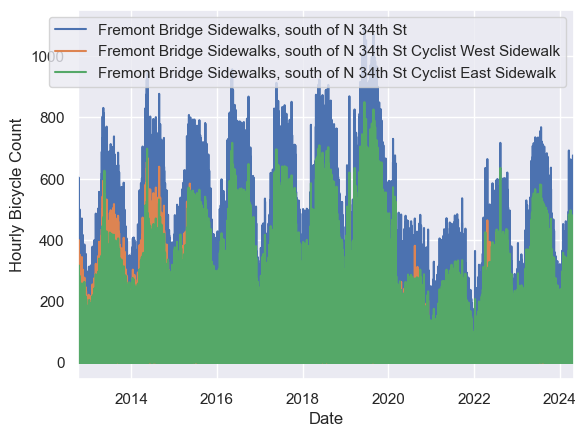

In [47]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

Las ~25.000 muestras por hora son demasiado densas para que podamos entenderlas.
Podemos obtener más información volviendo a muestrear los datos en una cuadrícula más gruesa.
Volvamos a muestrear por semana:

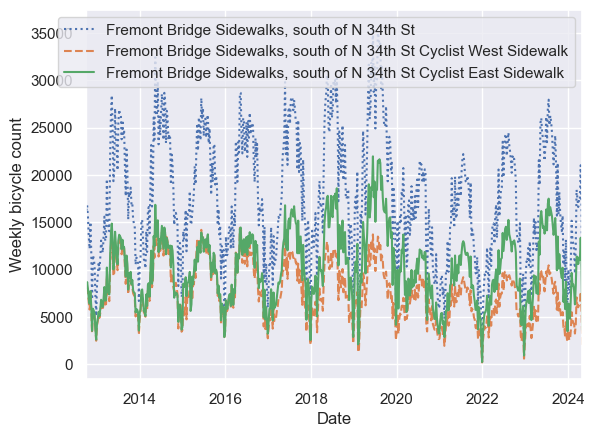

In [48]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

Esto nos muestra algunas tendencias estacionales interesantes: como era de esperar, la gente anda en bicicleta más en verano que en invierno, e incluso dentro de una temporada particular el uso de la bicicleta varía de una semana a otra (probablemente dependiendo del clima).

Otra forma que resulta útil para agregar datos es utilizar una media móvil, utilizando la función ``pd.rolling_mean()``.
Aquí haremos una media móvil de 30 días de nuestros datos, asegurándonos de centrar la ventana:

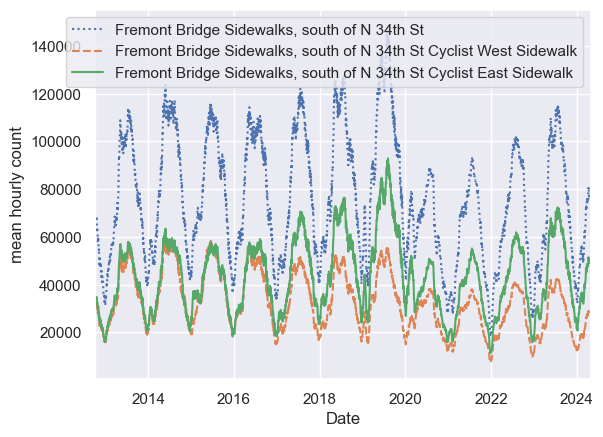

In [49]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

La irregularidad del resultado se debe al corte brusco de la ventana.
Podemos obtener una versión más suave de una media móvil usando una función de ventana, por ejemplo, una ventana gaussiana.
El siguiente código especifica tanto el ancho de la ventana (elegimos 50 días) como el ancho gaussiano dentro de la ventana (elegimos 10 días):

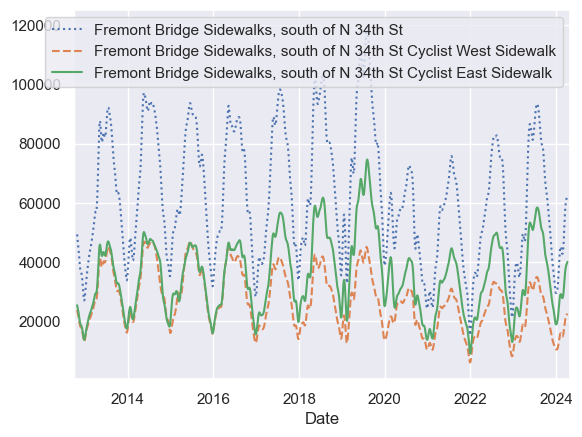

In [50]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### Profundizando en los datos

Si bien estas vistas de datos suavizadas son útiles para tener una idea de la tendencia general de los datos, ocultan gran parte de la estructura interesante.
Por ejemplo, es posible que deseemos observar el tráfico promedio en función de la hora del día.
Podemos hacer esto usando la funcionalidad GroupBy.

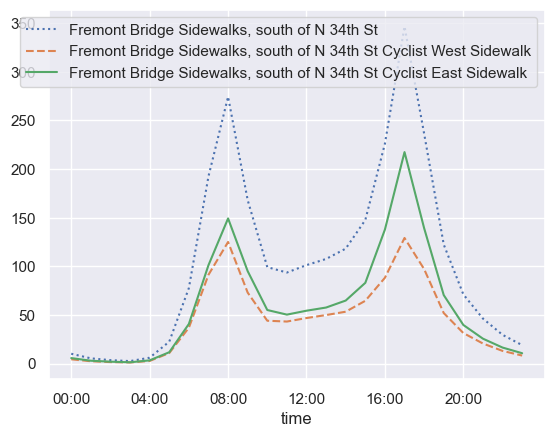

In [51]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

El tráfico horario tiene una distribución fuertemente bimodal, con picos alrededor de las 8:00 de la mañana y las 5:00 de la tarde.
Probablemente esto sea evidencia de un fuerte componente de tráfico de pasajeros que cruza el puente.
Esto se evidencia aún más por las diferencias entre la acera occidental (generalmente utilizada hacia el centro de Seattle), que alcanza su punto máximo por la mañana, y la acera del este (generalmente utilizada alejándose del centro de Seattle), que alcanza su punto máximo por la noche.

También podríamos sentir curiosidad por saber cómo cambian las cosas según el día de la semana. Nuevamente, podemos hacer esto con un simple grupo:

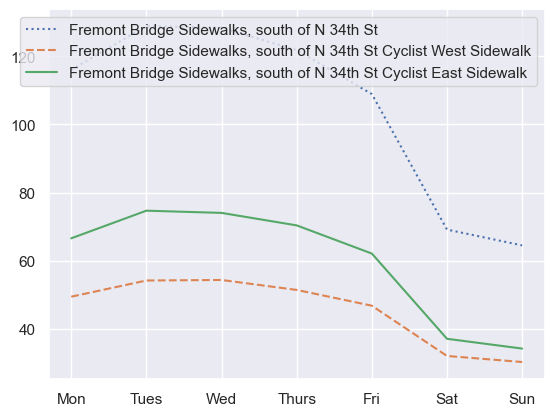

In [52]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

Esto muestra una fuerte distinción entre los totales de los días laborables y los fines de semana, con aproximadamente el doble de pasajeros promedio que cruzan el puente de lunes a viernes que los sábados y domingos.

Con esto en mente, hagamos un GroupBy compuesto y observemos la tendencia horaria entre semana y los fines de semana.
Comenzaremos agrupando por una bandera que marca el fin de semana y la hora del día:

In [53]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

In [54]:
by_time

Fremont Bridge Sidewalks, south of N 34th St  \
Weekday 00:00:00                                      8.261676   
        01:00:00                                      4.115932   
        02:00:00                                      2.776085   
        03:00:00                                      2.379927   
        04:00:00                                      7.157999   
        05:00:00                                     28.879762   
        06:00:00                                    102.152368   
        07:00:00                                    256.851606   
        08:00:00                                    360.475654   
        09:00:00                                    201.805832   
        10:00:00                                     96.376408   
        11:00:00                                     78.757204   
        12:00:00                                     83.637628   
        13:00:00                                     89.374834   
        14:00:00                                    102.166501   
        15:00:00                                    144.888779   
        16:00:00                                    260.231380   
        17:00:00                                    439.312479   
        18:00:00                                    295.841443   
        19:00:00                                    146.187355   
        20:00:00                                     82.674942   
        21:00:00                                     51.868587   
        22:00:00                                     32.686197   
        23:00:00                                     20.023833   
Weekend 00:00:00                                     14.899834   
        01:00:00                                      8.701987   
        02:00:00                                      5.608696   
        03:00:00                                      3.157285   
        04:00:00                                      3.456126   
        05:00:00                                      6.863411   
        06:00:00                                     16.566225   
        07:00:00                                     31.778146   
        08:00:00                                     59.144868   
        09:00:00                                     83.877483   
        10:00:00                                    106.294702   
        11:00:00                                    130.842715   
        12:00:00                                    145.353477   
        13:00:00                                    153.229305   
        14:00:00                                    158.391556   
        15:00:00                                    154.619205   
        16:00:00                                    140.762417   
        17:00:00                                    114.920530   
        18:00:00                                     88.071192   
        19:00:00                                     63.192053   
        20:00:00                                     42.475993   
        21:00:00                                     32.474338   
        22:00:00                                     21.903146   
        23:00:00                                     16.427980   

                  Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  \
Weekday 00:00:00                                           3.600861                    
        01:00:00                                           1.838357                    
        02:00:00                                           1.187479                    
        03:00:00                                           1.165287                    
        04:00:00                                           3.285856                    
        05:00:00                                          13.966545                    
        06:00:00                                          48.725406                    
        07:00:00                                         122.092083            